In [11]:
#loading packages
pacman::p_load(tidyverse, tidyr, dplyr, ggplot2, readxl, haven)

In [12]:
#reading our datasets
stores=read.csv("Global Superstore.csv")

In [13]:
#Viewing the first five rows of our dataset
head(stores, 5)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,City,State,⋯,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,⋯,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wireless Headset System,2309.650,7,0.0,762.1845,933.57,Critical
2,26341,IN-2013-77878,5/2/2013,7/2/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,⋯,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
3,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,⋯,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
4,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,⋯,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
5,47221,SG-2013-4320,5/11/2013,6/11/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,⋯,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [14]:
#Checking the dimension of our dataset
dim(stores)

[1] 51290    24

In [15]:
#listing all the column names
names(stores)

[1] "Row.ID"         "Order.ID"       "Order.Date"     "Ship.Date"     
 [5] "Ship.Mode"      "Customer.ID"    "Customer.Name"  "Segment"       
 [9] "City"           "State"          "Country"        "Postal.Code"   
[13] "Market"         "Region"         "Product.ID"     "Category"      
[17] "Sub.Category"   "Product.Name"   "Sales"          "Quantity"      
[21] "Discount"       "Profit"         "Shipping.Cost"  "Order.Priority"

In [16]:
#lets check if any column has missing values
NAs=colSums(is.na(stores))
names(stores)[NAs>0]

[1] "Postal.Code"

In [17]:
#checking the description of each column
str(stores)

'data.frame':	51290 obs. of  24 variables:
 $ Row.ID        : int  32298 26341 25330 13524 47221 22732 30570 31192 40155 40936 ...
 $ Order.ID      : chr  "CA-2012-124891" "IN-2013-77878" "IN-2013-71249" "ES-2013-1579342" ...
 $ Order.Date    : chr  "31-07-2012" "5/2/2013" "17-10-2013" "28-01-2013" ...
 $ Ship.Date     : chr  "31-07-2012" "7/2/2013" "18-10-2013" "30-01-2013" ...
 $ Ship.Mode     : chr  "Same Day" "Second Class" "First Class" "First Class" ...
 $ Customer.ID   : chr  "RH-19495" "JR-16210" "CR-12730" "KM-16375" ...
 $ Customer.Name : chr  "Rick Hansen" "Justin Ritter" "Craig Reiter" "Katherine Murray" ...
 $ Segment       : chr  "Consumer" "Corporate" "Consumer" "Home Office" ...
 $ City          : chr  "New York City" "Wollongong" "Brisbane" "Berlin" ...
 $ State         : chr  "New York" "New South Wales" "Queensland" "Berlin" ...
 $ Country       : chr  "United States" "Australia" "Australia" "Germany" ...
 $ Postal.Code   : int  10024 NA NA NA NA NA NA NA 95823 28027

In [27]:
#Separating the dates into other new columns i.e shipping day, month or year
Stores <- Stores %>% 
  separate(col = Order.Date, 
           into = c("Order.Day", "Order.Month", "Order.Year"),
           sep = "[-/]",
           remove = FALSE)

ERROR: [1m[33mError[39m in `separate()`:[22m
[1mCaused by error:[22m
[33m![39m object 'Order.Date' not found


In [24]:
Stores=Stores %>% 
  separate(col="Ship.Date",
           into=c("Ship.Day","Ship.Month","Ship.Year"),
           sep="[-/]", remove = FALSE)

ERROR: [1m[33mError[39m in `separate()`:[22m
[1mCaused by error:[22m
[33m![39m object 'Ship.Date' not found


In [ ]:
#converting a few columns into the necessary wanted datatypes
Stores$Order.Day=as.integer(Stores$Order.Day)
Stores$Order.Month=as.integer(Stores$Order.Month)
Stores$Order.Year=as.integer(Stores$Order.Year)
Stores$Ship.Day=as.integer(Stores$Ship.Day)
Stores$Ship.Month=as.integer(Stores$Order.Month)
Stores$Ship.Year=as.integer(Stores$Ship.Year)
Stores$Ship.Mode=as.factor(Stores$Ship.Mode)
Stores$Category=as.factor(Stores$Category)
Stores$Order.Priority =as.factor(Stores$Order.Priority)
Stores$Ship.Month=as.character(Stores$Order.Month)
Stores$Order.Month=as.character(Stores$Order.Month)

In [ ]:
#renaming the months into the expected
Stores=Stores %>% 
  mutate(
    Order.Month =case_when(Order.Month == 1 ~ "January",Order.Month == 2 ~ "February",
                         Order.Month == 3 ~ "March",Order.Month == 4 ~ "April",
                         Order.Month == 5 ~ "May",Order.Month == 6 ~ "June",
                         Order.Month == 7 ~ "July",Order.Month == 8 ~ "August",
                         Order.Month == 9 ~ "September",Order.Month == 10 ~ "October",
                         Order.Month == 11 ~ "November",Order.Month == 12 ~ "December"))

Stores=Stores %>% 
  mutate(
    Ship.Month =case_when(Ship.Month == 1 ~ "January",Ship.Month == 2 ~ "February",
                         Ship.Month == 3 ~ "March",Ship.Month == 4 ~ "April",
                         Ship.Month == 5 ~ "May",Ship.Month == 6 ~ "June",
                         Ship.Month == 7 ~ "July",Ship.Month == 8 ~ "August",
                         Ship.Month == 9 ~ "September",Ship.Month == 10 ~ "October",
                         Ship.Month == 11 ~ "November",Ship.Month == 12 ~ "December"))

In [29]:
#checking the datatypes again
str(Stores)

'data.frame':	51290 obs. of  28 variables:
 $ Row.ID        : int  32298 26341 25330 13524 47221 22732 30570 31192 40155 40936 ...
 $ Order.ID      : chr  "CA-2012-124891" "IN-2013-77878" "IN-2013-71249" "ES-2013-1579342" ...
 $ Order.Day     : int  31 5 17 28 5 28 7 14 14 28 ...
 $ Order.Month   : int  7 2 10 1 11 6 11 4 10 1 ...
 $ Order.Year    : int  2012 2013 2013 2013 2013 2013 2011 2012 2014 2012 ...
 $ Ship.Day      : int  31 7 18 30 6 1 9 18 21 31 ...
 $ Ship.Month    : int  7 2 10 1 11 6 11 4 10 1 ...
 $ Ship.Year     : int  2012 2013 2013 2013 2013 2013 2011 2012 2014 2012 ...
 $ Ship.Mode     : Factor w/ 4 levels "First Class",..: 2 3 1 1 2 3 1 4 4 3 ...
 $ Customer.ID   : chr  "RH-19495" "JR-16210" "CR-12730" "KM-16375" ...
 $ Customer.Name : chr  "Rick Hansen" "Justin Ritter" "Craig Reiter" "Katherine Murray" ...
 $ Segment       : chr  "Consumer" "Corporate" "Consumer" "Home Office" ...
 $ City          : chr  "New York City" "Wollongong" "Brisbane" "Berlin" ...
 $ State

In [30]:
#lets now get the summary for our dataset
summary(Stores)

     Row.ID        Order.ID           Order.Day      Order.Month    
 Min.   :    1   Length:51290       Min.   : 1.00   Min.   : 1.000  
 1st Qu.:12823   Class :character   1st Qu.: 8.00   1st Qu.: 5.000  
 Median :25646   Mode  :character   Median :16.00   Median : 8.000  
 Mean   :25646                      Mean   :15.78   Mean   : 7.523  
 3rd Qu.:38468                      3rd Qu.:23.00   3rd Qu.:10.000  
 Max.   :51290                      Max.   :31.00   Max.   :12.000  
                                                                    
   Order.Year      Ship.Day       Ship.Month       Ship.Year   
 Min.   :2011   Min.   : 1.00   Min.   : 1.000   Min.   :2011  
 1st Qu.:2012   1st Qu.: 8.00   1st Qu.: 5.000   1st Qu.:2012  
 Median :2013   Median :16.00   Median : 8.000   Median :2013  
 Mean   :2013   Mean   :15.87   Mean   : 7.523   Mean   :2013  
 3rd Qu.:2014   3rd Qu.:23.00   3rd Qu.:10.000   3rd Qu.:2014  
 Max.   :2014   Max.   :31.00   Max.   :12.000   Max.   :2015  


# Perform an Exploratory Data Analysis

# Customers Analysis		
1.Profile the customers based on their frequency of purchase - calculate frequency of purchase for each customer

In [35]:
freq_purch=Stores %>% 
  select(Customer.ID, Customer.Name) %>% 
  group_by(Customer.Name) %>% 
  summarise(Frequency=n()) %>% 
  arrange(Frequency, by_group = TRUE)

Most_frequent_customers=tail(freq_purch,5)
print(Most_frequent_customers)

# A tibble: 5 × 2
  Customer.Name   Frequency
  <chr>               <int>
1 Bill Eplett           102
2 Gary Hwang            102
3 Patrick O'Brill       102
4 Steven Ward           106
5 Muhammed Yedwab       108


2.Do the high frequent customers are contributing more revenue

In [36]:
Stores %>% 
  select(Customer.ID, Customer.Name, Sales) %>% 
  group_by(Customer.Name) %>%
  summarise(Total_sales=sum(Sales),Frequency=n()) %>% 
  arrange(desc(Total_sales),desc(Frequency)) %>%
  head(5)


Customer.Name,Total_sales,Frequency
<chr>,<dbl>,<int>
Tom Ashbrook,40488.07,80
Tamara Chand,37457.33,88
Greg Tran,35550.95,87
Christopher Conant,35187.08,73
Sean Miller,35170.93,50


No.The frequent customers do not contribute much to the revenue

3.Are they also profitable - what is the profit margin across the buckets

In [38]:
Stores %>% 
  select(Customer.ID, Customer.Name, Profit) %>% 
  group_by(Customer.Name) %>%
  summarise(Total_Profits=sum(Profit),Frequency=n()) %>% 
  arrange(desc(Total_Profits),desc(Frequency)) %>% 
  head(5)

Customer.Name,Total_Profits,Frequency
<chr>,<dbl>,<int>
Tamara Chand,8672.899,88
Raymond Buch,8453.050,71
Sanjit Chand,8205.380,69
Hunter Lopez,7816.568,53
Bill Eplett,7410.005,102


4.Which customer segment is most profitable in each year.	

In [42]:
segment_customer =Stores %>% 
  select(Segment, Profit) %>% 
  group_by(Segment) %>% 
  summarise(Total_Profits=ceiling(sum(Profit))) %>% 
  arrange(desc(Total_Profits))

print(segment_customer)

# A tibble: 3 × 2
  Segment     Total_Profits
  <chr>               <dbl>
1 Consumer           749240
2 Corporate          441209
3 Home Office        277010


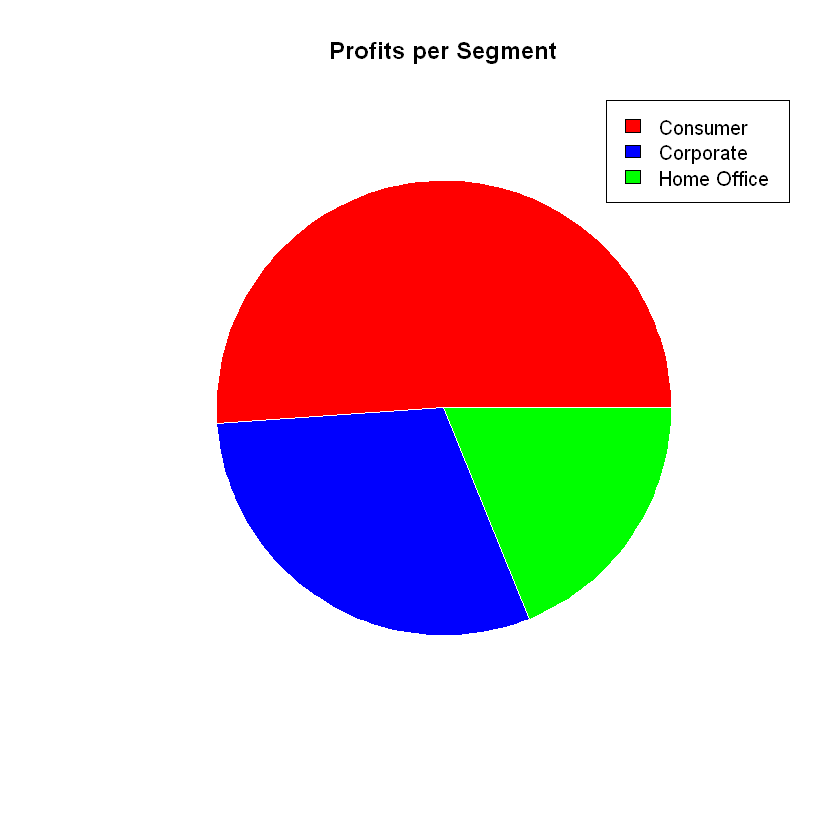

In [43]:
pie(segment_customer$Total_Profits,
    labels =NA,
    lwd=2,
    main = "Profits per Segment",
    border="white",
    col = c("red","blue","green",
    cex.main =1.5
    ))

legend("topright", legend=segment_customer$Segment,fill = c("red","blue","green", title = "Segments"))

5.How are the customers distributed across the countries?		

In [44]:
dist_Country=Stores %>% 
  select(Country) %>% 
  group_by(Country) %>% 
  summarise(Frequency=n())

# Product Analysis		
1.Which country has top sales?

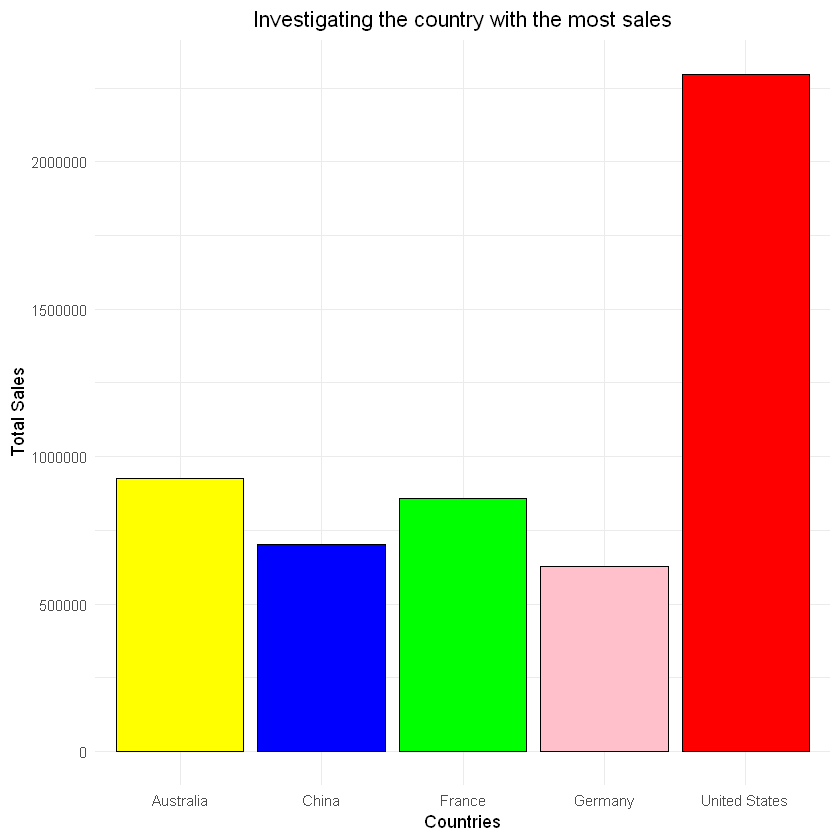

In [45]:
c_top=Stores %>%
  select(Country, Sales) %>% 
  group_by(Country) %>% 
  summarise(Total_Sales=sum(Sales)) %>% 
  arrange(desc(Total_Sales)) %>% 
  head(5)

ggplot(c_top, aes(x=Country, y=Total_Sales))+
  geom_bar(stat="identity",col="black",fill=c("red","yellow","green","blue","pink"))+
  labs(title = "Investigating the country with the most sales", x="Countries",y="Total Sales")+
  theme_minimal()+
  scale_fill_manual()+
  theme(plot.title = element_text(hjust=0.5))

Hence the country with the most sales  is the United States

2.Which are the top 5 profit-making product types on a yearly basis?

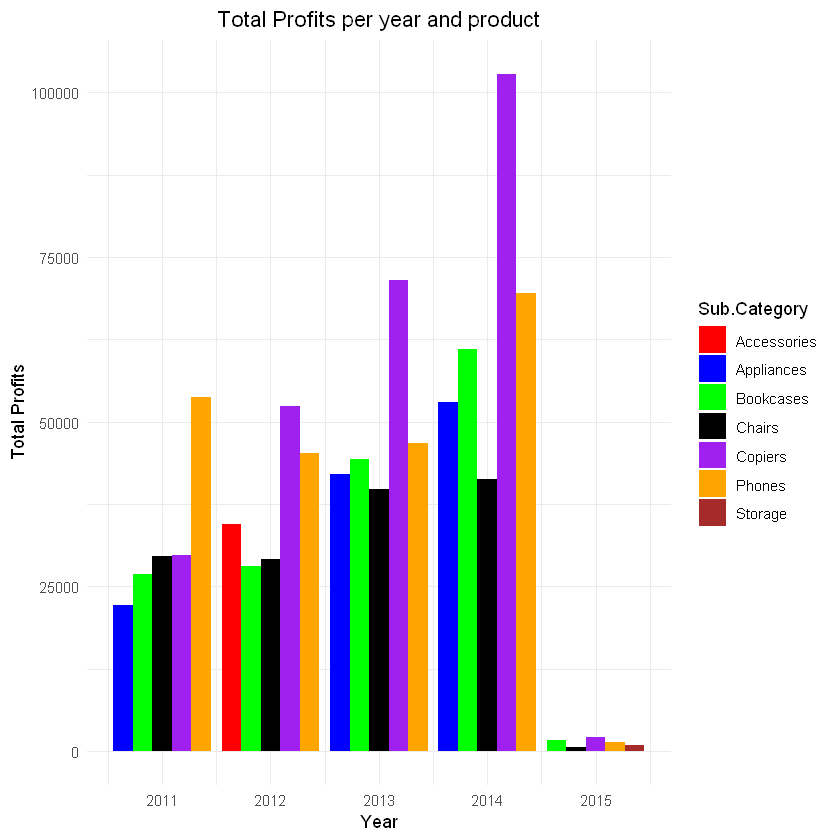

In [46]:
profit_product <- 
  rbind(
  (Stores %>% 
  select(Ship.Year, Sub.Category, Profit) %>% 
  filter(Ship.Year == 2011) %>% 
  group_by(Ship.Year,Sub.Category) %>% 
  summarise(Total_profits = ceiling(sum(Profit)), .groups = 'drop') %>% 
  arrange(desc(Total_profits)) %>% 
  head(5)),
  (Stores %>% 
  select(Ship.Year, Sub.Category, Profit) %>% 
  filter(Ship.Year == 2012) %>% 
  group_by(Ship.Year,Sub.Category) %>% 
  summarise(Total_profits = ceiling(sum(Profit)), .groups = 'drop') %>% 
  arrange(desc(Total_profits)) %>% 
  head(5)),
  (Stores %>% 
  select(Ship.Year, Sub.Category, Profit) %>% 
  filter(Ship.Year == 2013) %>% 
  group_by(Ship.Year,Sub.Category) %>% 
  summarise(Total_profits = ceiling(sum(Profit)), .groups = 'drop') %>% 
  arrange(desc(Total_profits)) %>% 
  head(5)),
  (Stores %>% 
  select(Ship.Year, Sub.Category, Profit) %>% 
  filter(Ship.Year == 2014) %>% 
  group_by(Ship.Year,Sub.Category) %>% 
  summarise(Total_profits = ceiling(sum(Profit)), .groups = 'drop') %>% 
  arrange(desc(Total_profits)) %>% 
  head(5)),
  (Stores %>% 
  select(Ship.Year, Sub.Category, Profit) %>% 
  filter(Ship.Year == 2015) %>% 
  group_by(Ship.Year,Sub.Category) %>% 
  summarise(Total_profits = ceiling(sum(Profit)), .groups = 'drop') %>% 
  arrange(desc(Total_profits)) %>% 
  head(5)))
  
ggplot(profit_product, aes(x=Ship.Year, y=Total_profits, fill=Sub.Category))+
  geom_bar(stat = "identity", position = "dodge")+
  labs(title = "Total Profits per year and product", x= "Year", y= "Total Profits")+
  theme_minimal()+
  theme(plot.title = element_text(hjust = 0.5))+
  scale_fill_manual(values = c("red","blue","green","black","purple","orange","brown"))

3.How is the product price varying with sales - Is there any increase in sales with the decrease in price at any level?

4.What is the average delivery time across the countries?

5.What is the profit by month? (Use a line chart to visualize this.)

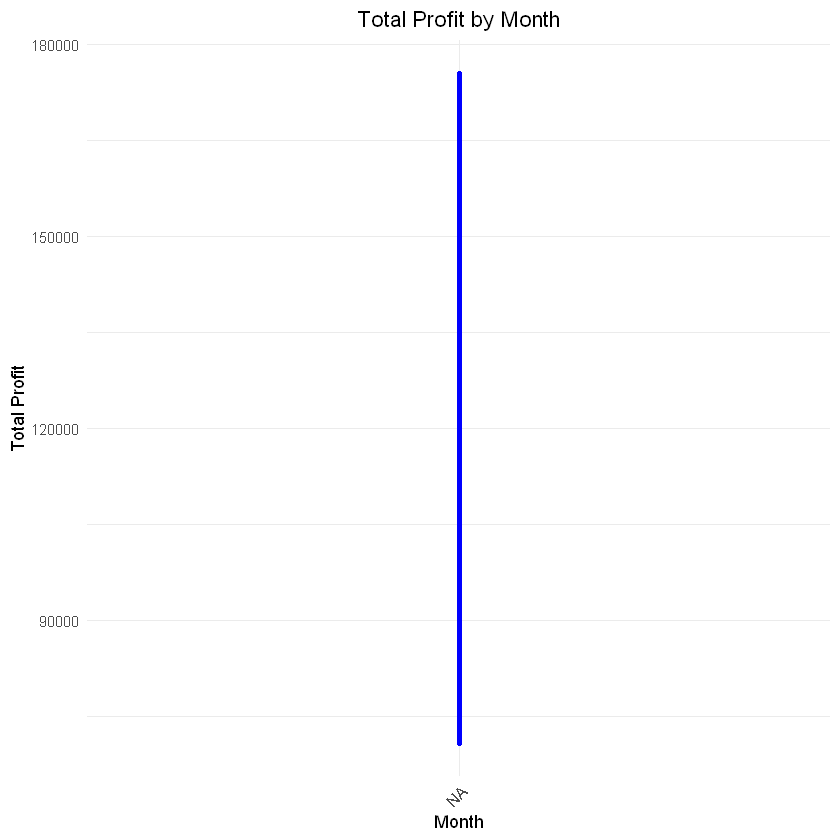

In [47]:
profit_month=Stores %>% 
  select(Order.Month, Profit) %>% 
  group_by(Order.Month) %>% 
  summarise(Total_Profits=ceiling(sum(Profit)))

profit_month$Order.Month <- factor(profit_month$Order.Month, levels = month.name)

ggplot(profit_month, aes(x = Order.Month, y = Total_Profits, group=1)) +
  geom_line(color = "blue", linewidth = 1.5) + 
  labs(title = "Total Profit by Month", x = "Month", y = "Total Profit") +
  theme_minimal() + 
  theme(
    plot.title = element_text(hjust = 0.5),  
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

6.Profit by category? By Subcategory?	

# A tibble: 17 × 2
   Sub.Category Total_Profits
   <chr>                <dbl>
 1 Accessories         129627
 2 Appliances          141681
 3 Art                  57954
 4 Binders              72450
 5 Bookcases           161925
 6 Chairs              140397
 7 Copiers             258568
 8 Envelopes            29602
 9 Fasteners            11526
10 Furnishings          46968
11 Labels               15011
12 Machines             58868
13 Paper                59208
14 Phones              216718
15 Storage             108462
16 Supplies             22584
17 Tables              -64083


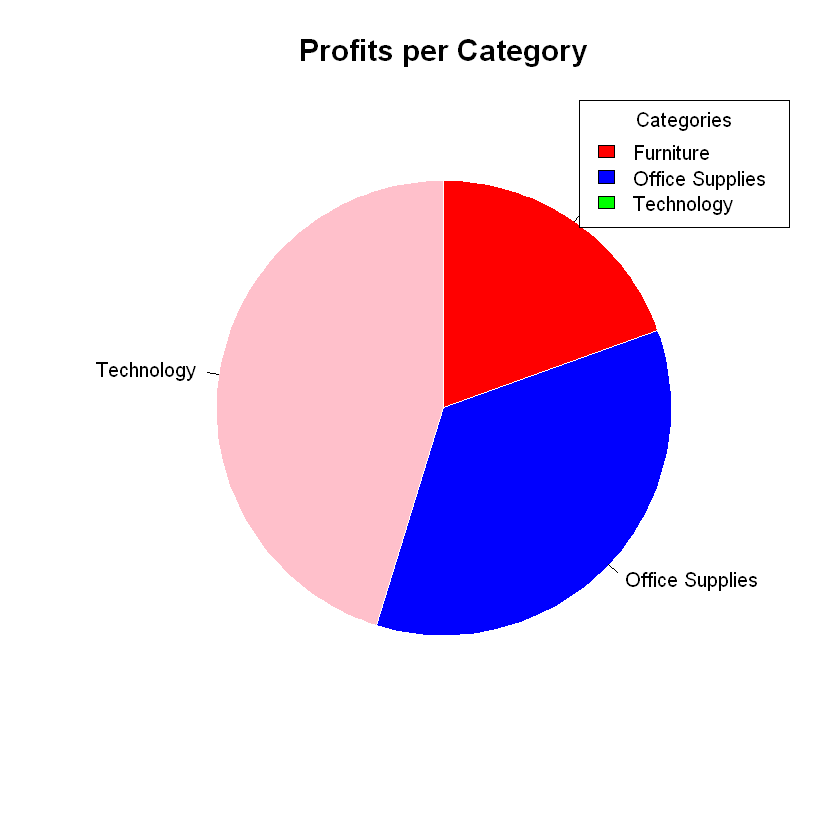

In [48]:
profit_category=Stores %>% 
  select(Category, Profit) %>% 
  group_by(Category) %>% 
  summarise(Total_Profits=ceiling(sum(Profit)))

profit_subcategory=Stores %>% 
  select(Sub.Category, Profit) %>% 
  group_by(Sub.Category) %>% 
  summarise(Total_Profits=ceiling(sum(Profit)))

print(profit_subcategory)


pie(profit_category$Total_Profits, 
    labels = profit_category$Category,
    lwd=2,
    main="Profits per Category",
    col=c("red", "blue","pink"),
    border = "white",  # Add white border around each slice
  lwd = 2,  # Increase line width for slice outlines
  clockwise = TRUE,  # Change the direction of the slices to clockwise
  init.angle = 90,  # Start drawing slices from the top (90 degrees)
  cex.main = 1.5,  # Increase the size of the main title
  cex.lab = 1.2,   # Increase the size of the labels
  cex.axis = 0.8   # Adjust the size of the axis text
  )

legend("topright", legend=profit_category$Category, fill=c("red","blue","green"), title="Categories")

7.Sales by month? By category? By subcategory?

# A tibble: 17 × 2
   Sub.Category Total_Sales
   <chr>              <dbl>
 1 Accessories       749238
 2 Appliances       1011065
 3 Art               372092
 4 Binders           461912
 5 Bookcases        1466573
 6 Chairs           1501682
 7 Copiers          1509437
 8 Envelopes         170905
 9 Fasteners          83243
10 Furnishings       385579
11 Labels             73405
12 Machines          779061
13 Paper             244292
14 Phones           1706825
15 Storage          1127086
16 Supplies          243075
17 Tables            757042


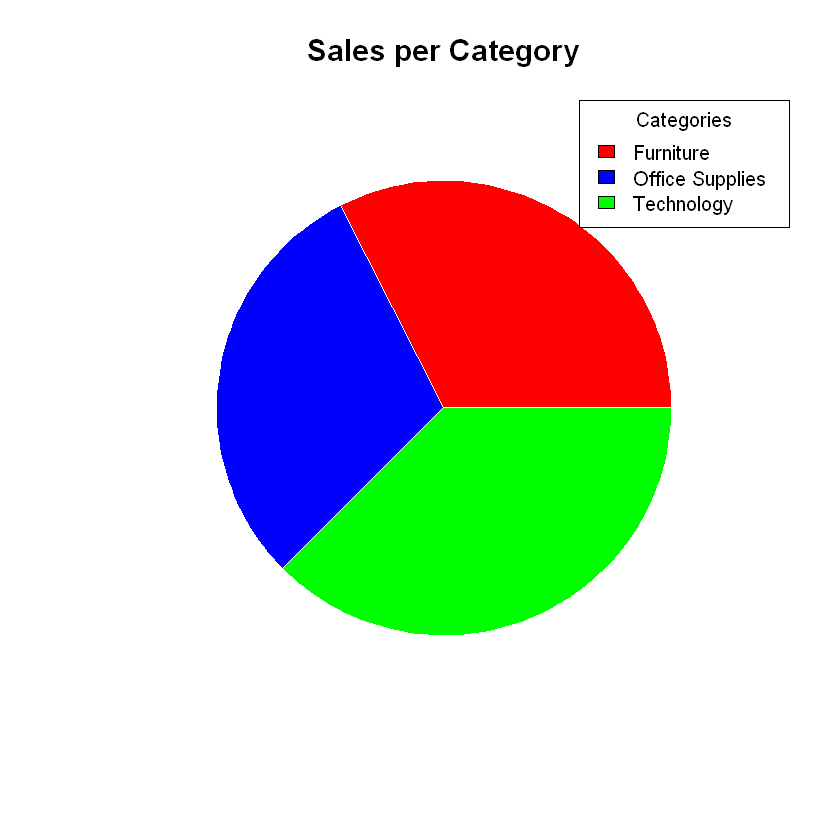

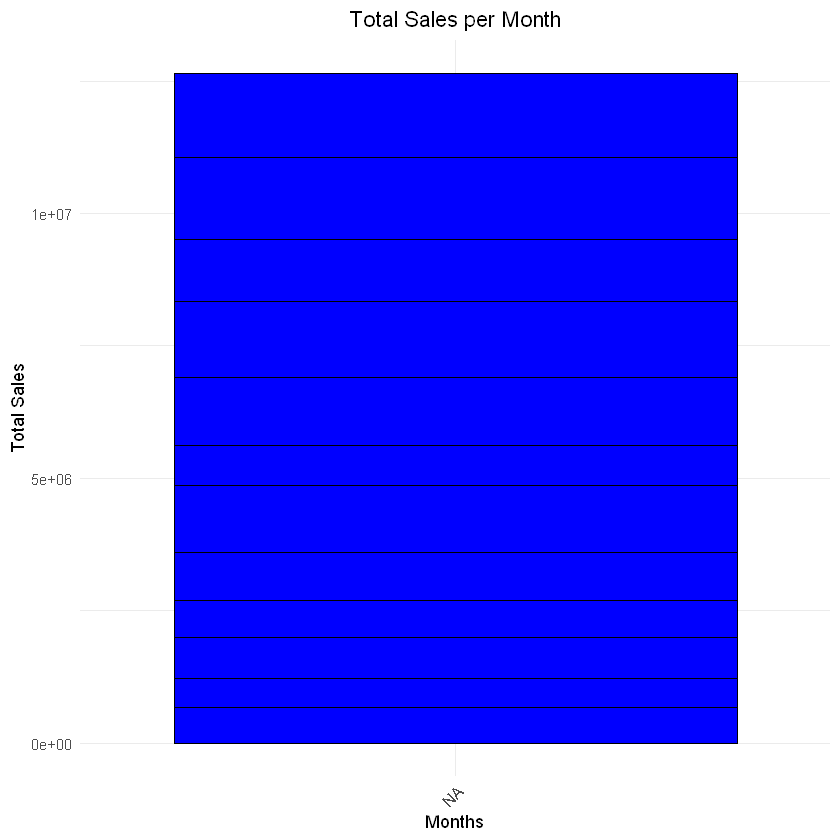

In [49]:
sales_month=Stores %>% 
  select(Order.Month, Sales) %>% 
  group_by(Order.Month) %>% 
  summarise(Total_Sales=ceiling(sum(Sales)))

sales_month$Order.Month <- factor(sales_month$Order.Month, levels = month.name)

sales_category=Stores %>% 
  select(Category, Sales) %>% 
  group_by(Category) %>% 
  summarise(Total_Sales=ceiling(sum(Sales)))

sales_subcategory=Stores %>% 
  select(Sub.Category, Sales) %>% 
  group_by(Sub.Category) %>% 
  summarise(Total_Sales=ceiling(sum(Sales)))

print(sales_subcategory)

pie(sales_category$Total_Sales,
    labels = NA,
    lwd=2,
    main="Sales per Category",
    col=c("red","blue","green"),
    border = "white",
    cex.main=1.5
    )

legend("topright", legend = sales_category$Category, fill = c("red","blue","green"), title = "Categories")

ggplot(sales_month, aes(x=Order.Month, y= Total_Sales))+
  geom_bar(stat="identity", col="black", fill="blue")+
  labs(title = "Total Sales per Month", x= "Months", y="Total Sales")+
  theme_minimal()+
  theme(
    plot.title = element_text(hjust=0.5),
    axis.text.x = element_text(angle = 45, hjust=1)
  )